In [19]:
import pandas as pd

In [21]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [25]:
# Load the data
data = pd.read_csv('admit.csv')

In [27]:
# Exploratory Data Analysis
print(data.head())
print(data.isnull().sum())
print(data.describe())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
admit    0
gre      0
gpa      0
rank     0
dtype: int64
            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


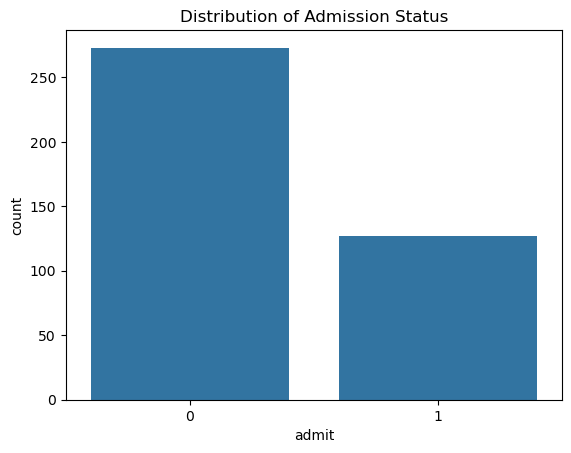

admit
0    273
1    127
Name: count, dtype: int64


In [29]:

# Check class balance
sns.countplot(x='admit', data=data)
plt.title('Distribution of Admission Status')
plt.show()
print(data['admit'].value_counts())

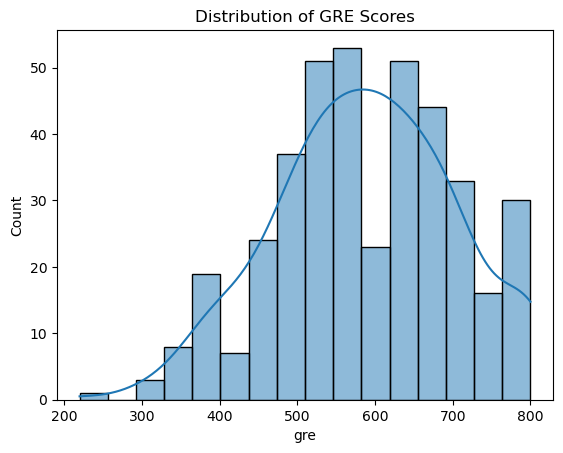

-0.1443566113053209


In [31]:
# Distribution of GRE scores
sns.histplot(data['gre'], kde=True)
plt.title('Distribution of GRE Scores')
plt.show()
print(data['gre'].skew())

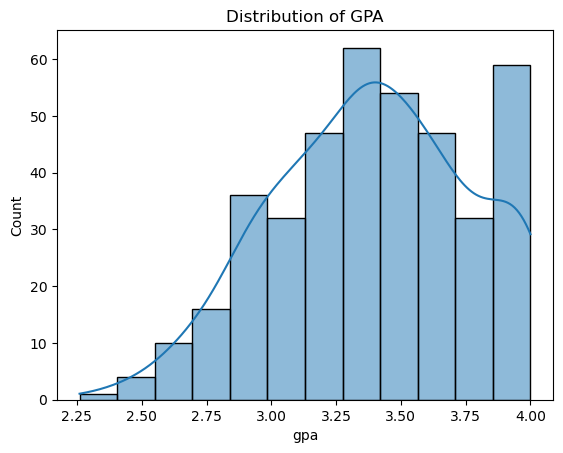

-0.20869771069942603


In [33]:
# Distribution of GPA scores
sns.histplot(data['gpa'], kde=True)
plt.title('Distribution of GPA')
plt.show()
print(data['gpa'].skew())

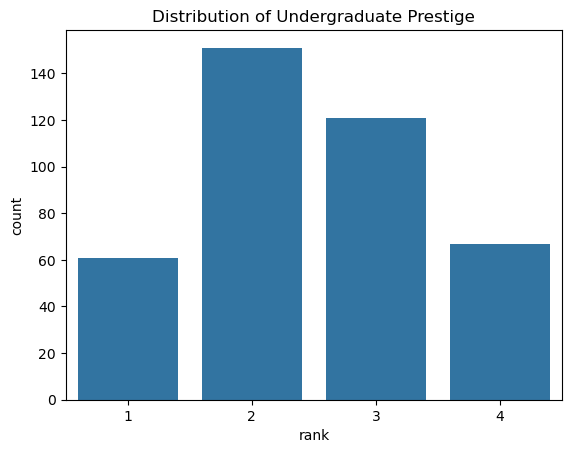

In [37]:
# Distribution of Rank
sns.countplot(x='rank', data=data)
plt.title('Distribution of Undergraduate Prestige')
plt.show()

In [41]:
X = data[['gre', 'gpa', 'rank']]
y = data['admit']
X = pd.get_dummies(X, drop_first=True)

In [43]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 320
Test set size: 80


In [45]:
# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [51]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6625
Precision: 0.5000
Recall: 0.0741
Confusion Matrix:
[[51  2]
 [25  2]]


In [53]:
# Which Feature has the Most Importance 
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)


      Coefficient
gre      0.001853
gpa      0.782976
rank    -0.602242


In [17]:
# Using print statements for text output
print("Markdown and LaTeX:")
print("This is plain text")

print(r"LaTeX equation: E = mc^2")

Markdown and LaTeX:
This is plain text
LaTeX equation: E = mc^2


In [59]:
#Are the classes balanced?
data['admit'].value_counts()

admit
0    273
1    127
Name: count, dtype: int64

In [61]:
#Is the distribution of GRE scores skewed?
data['gre'].skew()

-0.1443566113053209